In [28]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [29]:
def convert_feature_one_hot_encoder(df: pd.DataFrame, feature: str) -> pd.DataFrame:
    """
    This method receives a Pandas dataframe and convert some features using the One Hot Encoder
    
    :param df: A Pandas dataframe
    :param feature: The name of the feature to convert
    :return: A Pandas dataframe with the features converted
    """
    ohe = OneHotEncoder()
    ohe.fit(df[feature].to_numpy().reshape(-1, 1))
    transformed = ohe.transform(df[feature].to_numpy().reshape(-1, 1)).toarray()
    columns = []
    for c in ohe.get_feature_names():
        columns.append(c.replace("x0", feature))
    ohe_df = pd.DataFrame(transformed, columns=columns)
    # Concats the result with the original data
    return pd.concat([df, ohe_df], axis=1)

In [37]:
df = pd.read_csv("dados/bank_t2.txt", delimiter = "\t")

In [38]:
df.head()

,age,marital,education,housing.loan,personal.loan,contact,day.of.week,duration.contact,number.contatcs.campaign,poutcome,term.deposit
0,30,married,basic,1,0,cellular,fri,487,2,nonexistent,0
1,39,single,high.school,0,0,telephone,fri,346,4,nonexistent,0
2,25,married,high.school,1,0,telephone,wed,227,1,nonexistent,0
3,47,married,university.degree,1,0,cellular,mon,58,1,nonexistent,0
4,32,single,university.degree,0,0,cellular,thu,128,3,failure,0


In [39]:
df.describe()

,age,housing.loan,personal.loan,duration.contact,number.contatcs.campaign,term.deposit
count,3836.000000,3836.000000,3836.000000,3836.000000,3836.000000,3836.000000
mean,40.001564,0.543796,0.167101,256.438478,2.535975,0.108186
std,10.236627,0.498143,0.373115,256.860414,2.583371,0.310655
min,19.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,32.000000,0.000000,0.000000,103.000000,1.000000,0.000000
50%,38.000000,1.000000,0.000000,180.000000,2.000000,0.000000
75%,47.000000,1.000000,0.000000,316.000000,3.000000,0.000000
max,88.000000,1.000000,1.000000,3643.000000,35.000000,1.000000


In [40]:
columns_to_convert = ["marital", "education", "contact", "day.of.week", "poutcome"]
for c in columns_to_convert:
    df = convert_feature_one_hot_encoder(df, c)
    
df.drop(columns_to_convert, axis=1, inplace=True)

# Normalizing all features between -1 and 1
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(df.values)
data = scaler.transform(df.values)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is d

### Searching for the best K

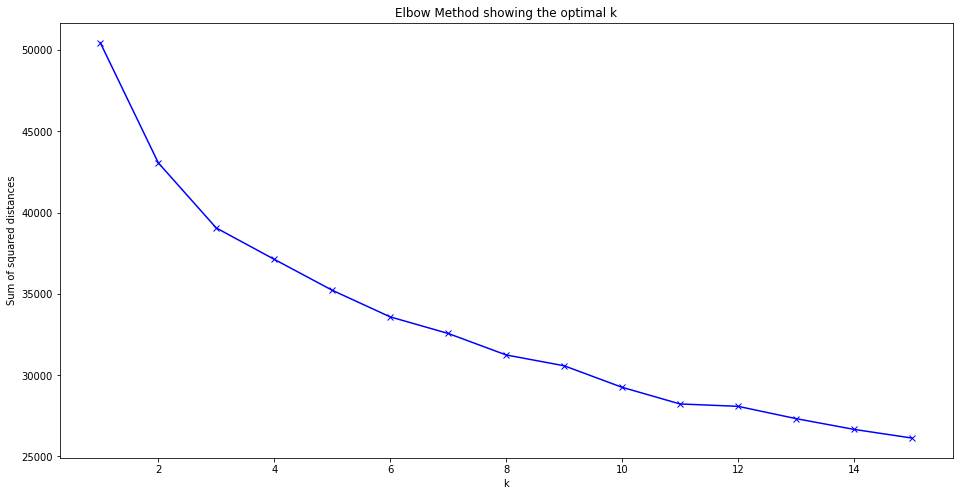

In [41]:
# Clusters size. From 1 to 20
k_clusters = [i for i in range(1,16)]
results = []
labels = []

for k in k_clusters:
    k_means = KMeans(n_clusters=k, random_state=0)
    labels = k_means.fit(data)
    results.append(k_means.inertia_)

plt.figure(figsize=(16,8))
plt.plot(k_clusters, results, "bx-")
plt.xlabel("k")
plt.ylabel("Sum of squared distances")
plt.title("Elbow Method showing the optimal k")
plt.show()


#### As we can see in the graph above, it is hard to distinguish the "elbow" of the curve. Giving the behaviour of the curve, we could chose between 3, 4 and 5.

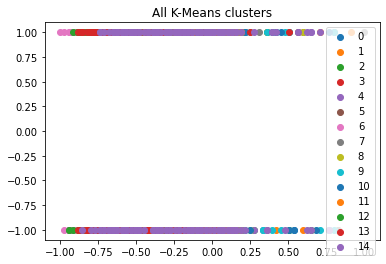

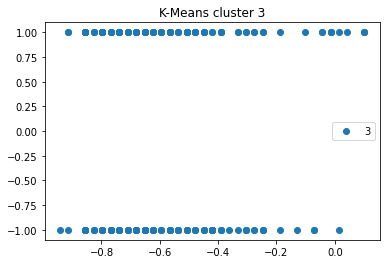

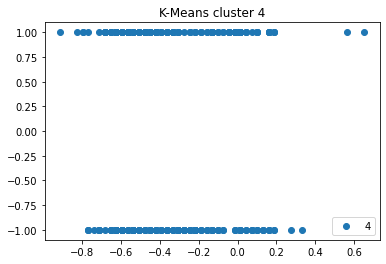

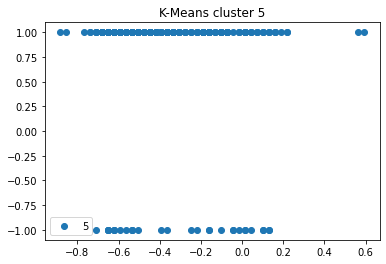

In [35]:
# Plot all K-Means clusters
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.legend()
plt.title("All K-Means clusters")
plt.show()

# Plot only K-Means Clusters 3, 4 and 5, individually
for i in range(3, 6):
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
    plt.legend()
    plt.title("K-Means cluster %d" % (i))
    plt.show()